<a href="https://colab.research.google.com/github/SVinodNayak/Machine-learning/blob/main/Isolation_Forest_for_Anomaly_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Isolation Forest**


ISolation Forest is a Machine learning algorithm that can be used to predict, If a given datapoint is an outlier or not.

It builds a randomized tree. Works similar to the Decision tree

In [36]:
#Loading the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

In [37]:
#Loading thw Dataset
data = pd.read_csv('/content/environmental_sensor_data.csv')
data.head()

,SensorID,Temperature,Humidity,AirQualityIndex,WindSpeed,Precipitation,SoilMoisture,CO2Level,LastCalibration,FaultFlag
0,1.0,8.727006,67.270299,194.477086,18.271560,65.430632,24.983512,1397.674136,01-01-2023,1.0
1,2.0,37.535715,79.668140,51.715909,10.507210,8.003257,37.337339,984.111440,01-01-2023,1.0
2,3.0,26.599697,25.046790,261.718369,14.498205,24.232981,28.133339,1102.245487,01-01-2023,0.0
3,4.0,19.932924,62.487410,183.934872,8.720966,77.367935,4.165129,1518.432131,01-01-2023,1.0
4,5.0,-2.199068,57.174598,47.161165,12.600692,52.868585,9.279012,1789.720250,01-01-2023,1.0


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SensorID         2961 non-null   float64
 1   Temperature      2956 non-null   float64
 2   Humidity         2957 non-null   float64
 3   AirQualityIndex  2963 non-null   float64
 4   WindSpeed        2940 non-null   float64
 5   Precipitation    2950 non-null   float64
 6   SoilMoisture     2951 non-null   float64
 7   CO2Level         2950 non-null   float64
 8   LastCalibration  2963 non-null   object 
 9   FaultFlag        2961 non-null   float64
dtypes: float64(9), object(1)
memory usage: 234.5+ KB


**1. Preprocess the dataset by handling missing values, normalizing the data, and dealing with any noise.**


In [39]:
# Converting  'LastCalibration' to datetime
data['LastCalibration'] = pd.to_datetime(data['LastCalibration'], format='%d-%m-%Y')

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   SensorID         2961 non-null   float64       
 1   Temperature      2956 non-null   float64       
 2   Humidity         2957 non-null   float64       
 3   AirQualityIndex  2963 non-null   float64       
 4   WindSpeed        2940 non-null   float64       
 5   Precipitation    2950 non-null   float64       
 6   SoilMoisture     2951 non-null   float64       
 7   CO2Level         2950 non-null   float64       
 8   LastCalibration  2963 non-null   datetime64[ns]
 9   FaultFlag        2961 non-null   float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 234.5 KB


In [41]:
#shape of the dataset
data.shape

(3000, 10)

In [42]:
#Checking the null values
data.isnull().sum()

,0
SensorID,39
Temperature,44
Humidity,43
AirQualityIndex,37
WindSpeed,60
Precipitation,50
SoilMoisture,49
CO2Level,50
LastCalibration,37
FaultFlag,39


In [43]:
#Droping the null value rows
data.dropna(subset=['SensorID'],inplace=True)
data.dropna(inplace=True)

In [44]:
data.isnull().sum()

,0
SensorID,0
Temperature,0
Humidity,0
AirQualityIndex,0
WindSpeed,0
Precipitation,0
SoilMoisture,0
CO2Level,0
LastCalibration,0
FaultFlag,0


In [45]:
#scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data.drop(['SensorID', 'LastCalibration'], axis=1))

In [58]:
# Add scaled features back to dataframe
scaled_df = pd.DataFrame(scaled_features, columns=data.columns[1:-2])

# Add non-scaled columns back
scaled_df['SensorID'] = data['SensorID']
scaled_df['LastCalibration'] = data['LastCalibration']
scaled_df['FaultFlag'] = data['FaultFlag']

print(scaled_df)

      Temperature  Humidity  AirQualityIndex  WindSpeed  Precipitation  \
0       -0.426574  0.621553         0.557548   1.426728       0.539470   
1        1.547743  1.051696        -1.108960   0.075132      -1.448284   
2        0.798276 -0.843391         1.342483   0.769873      -0.886519   
3        0.341389  0.455611         0.434485  -0.235813       0.952660   
4       -1.175359  0.271283        -1.162129   0.439559       0.104656   
...           ...       ...              ...        ...            ...   
2573     1.255048  0.662258         0.090633  -1.737765       0.527622   
2574    -1.171060  0.033533        -1.133530   1.287782      -1.109884   
2575    -0.648454  0.942294         1.711309  -0.683968      -1.547946   
2576    -0.716103 -0.028674        -1.334706   1.513805       0.638656   
2577     1.276013 -1.194109         1.551026  -0.650475      -0.856235   

      SoilMoisture  CO2Level LastCalibration  SensorID  FaultFlag  
0        -0.018096  0.453476      2023-01-0

**2. Implement Isolation Forest to detect anomalies in the sensor readings**


In [56]:
isolation_forest = IsolationForest(contamination='auto', random_state=42)
isolation_forest.fit(scaled_features)
data['Anomaly'] = isolation_forest.predict(scaled_features)
# Convert prediction from -1 (anomaly) and 1 (normal) to 1 and 0
data['Anomaly'] = data['Anomaly'].map({1: 0, -1: 1})
print(data[['SensorID', 'Anomaly']])


      SensorID  Anomaly
0          1.0        0
1          2.0        1
2          3.0        0
3          4.0        0
4          5.0        0
...        ...      ...
2995    2996.0        1
2996    2997.0        1
2997    2998.0        1
2998    2999.0        1
2999    3000.0        1

[2578 rows x 2 columns]


In [57]:
#Counting the two types of values 1->anomaly.  0->Non-anomaly
pd.value_counts(data['Anomaly'])

<ipython-input-57-d8bec1e72c79>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(data['Anomaly'])


,count
Anomaly,
1,1932
0,646


**3. Evaluate the model's performance**

In [48]:
#evaluating the model
from sklearn.metrics import classification_report

y_true = data['FaultFlag']
y_pred = data['Anomaly']
report = classification_report(y_true, y_pred)
print(report)


              precision    recall  f1-score   support

         0.0       0.57      0.27      0.37      1359
         1.0       0.49      0.77      0.60      1219

    accuracy                           0.51      2578
   macro avg       0.53      0.52      0.48      2578
weighted avg       0.53      0.51      0.48      2578



**4. Visualize the results using time-series plots and scatter plots to show normal vs. anomalous data points**


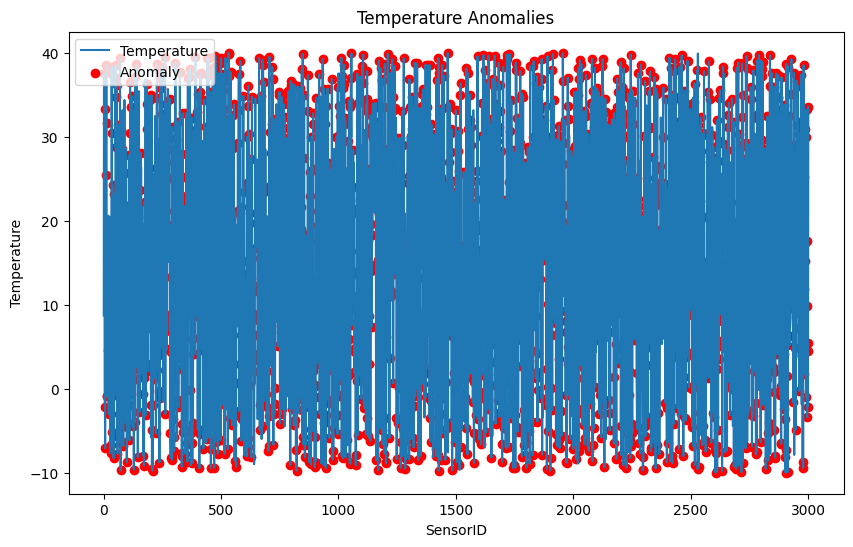

In [49]:
import matplotlib.pyplot as plt

# Time-series plot for Temperature with anomalies
plt.figure(figsize=(10, 6))
plt.plot(data['SensorID'], data['Temperature'], label='Temperature')
plt.scatter(data[data['Anomaly'] == 1]['SensorID'], data[data['Anomaly'] == 1]['Temperature'], color='red', label='Anomaly')
plt.xlabel('SensorID')
plt.ylabel('Temperature')
plt.title('Temperature Anomalies')
plt.legend()
plt.show()


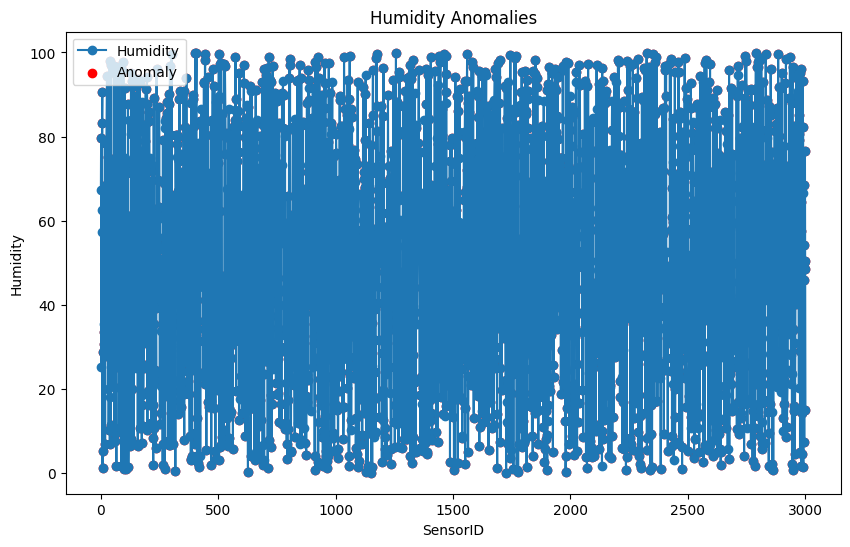

In [50]:
# Time-series plot for Humidity with anomalies
plt.figure(figsize=(10, 6))
plt.plot(data['SensorID'], data['Humidity'], label='Humidity', marker='o')
plt.scatter(data[data['Anomaly'] == 1]['SensorID'], data[data['Anomaly'] == 1]['Humidity'], color='red', label='Anomaly')
plt.xlabel('SensorID')
plt.ylabel('Humidity')
plt.title('Humidity Anomalies')
plt.legend()
plt.show()

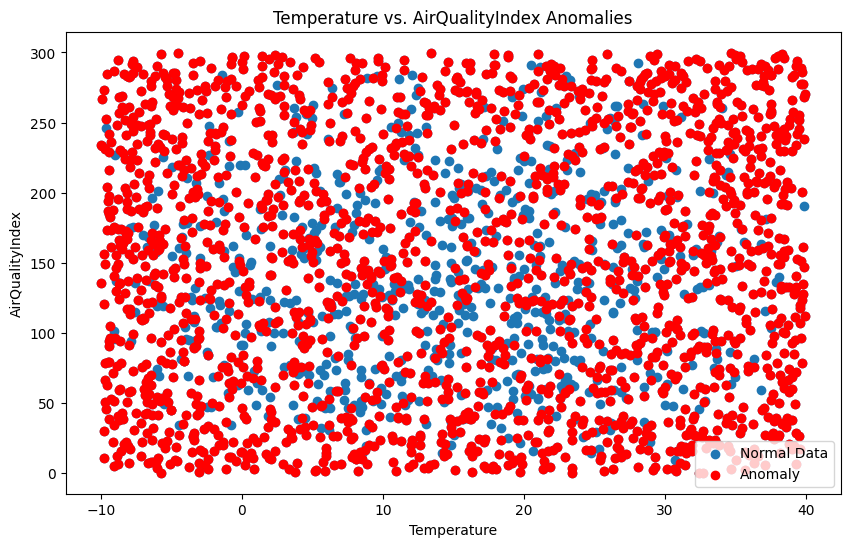

In [51]:
# Scatter plot for Temperature vs. AirQualityIndex with anomalies
plt.figure(figsize=(10, 6))
plt.scatter(data['Temperature'], data['AirQualityIndex'], label='Normal Data')
plt.scatter(data[data['Anomaly'] == 1]['Temperature'], data[data['Anomaly'] == 1]['AirQualityIndex'], color='red', label='Anomaly')
plt.xlabel('Temperature')
plt.ylabel('AirQualityIndex')
plt.title('Temperature vs. AirQualityIndex Anomalies')
plt.legend()
plt.show()

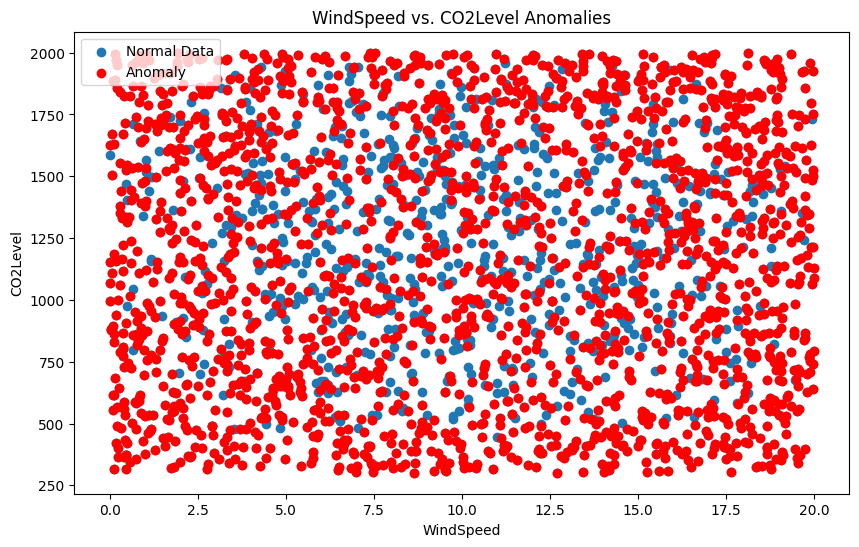

In [52]:
# Scatter plot for WindSpeed vs. CO2Level with anomalies
plt.figure(figsize=(10, 6))
plt.scatter(data['WindSpeed'], data['CO2Level'], label='Normal Data')
plt.scatter(data[data['Anomaly'] == 1]['WindSpeed'], data[data['Anomaly'] == 1]['CO2Level'], color='red', label='Anomaly')
plt.xlabel('WindSpeed')
plt.ylabel('CO2Level')
plt.title('WindSpeed vs. CO2Level Anomalies')
plt.legend()
plt.show()